<a href="https://colab.research.google.com/github/JOyongho4/DARTB4/blob/main/KoreanHealthRecords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [788]:
# 코렙 한글깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 브라우저에서 바로 그려지도록
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [789]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.ion()

import warnings

In [790]:
R1=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_01_data.csv')
R2=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_02_data.csv')
R3=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_03_data.csv')
R4=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_04_data.csv')
R5=pd.read_csv('https://raw.githubusercontent.com/JOyongho4/DARTB4/main/KoreanHealthRecords/follow_05_data.csv')

In [791]:
R1.head(3)

,T00_ID,T00_DATA_CLASS,T01_EDATE,T00_SEX,T01_AGE,T01_EDU,T01_MARRY,T01_DRINK,T01_DRDU,T01_TAKFQ,...,T01_DBP,T01_HBA1C,T01_GLU0,T01_CREATININE,T01_AST,T01_ALT,T01_TCHL,T01_HDL,T01_TG,T01_INS0
0,K_FOLLOW_0001,F05,200412,1,56,1,2,3,4,0,...,80,5.6,82,0.7,30,38,154,35,126,6.7
1,K_FOLLOW_0002,F19,200401,1,40,3,2,3,4,0,...,118,5.5,130,1.1,46,75,214,44,169,4.3
2,K_FOLLOW_0003,F05,200309,1,52,2,2,2,3,0,...,90,5.2,83,0.9,29,45,130,27,134,7.9


In [792]:
# 행열 개수 확인
print(R1.shape)

(1000, 64)


In [793]:
# 66666,99999는 결측치와 같음. 이 둘은 null값으로 변환, 77777은 0과 같음. 이는 0으로 변환
R1.replace(66666,np.nan,inplace=True)
R1.replace(99999,np.nan,inplace=True)
R1.replace(77777,0,inplace=True)
R1.head(10)

,T00_ID,T00_DATA_CLASS,T01_EDATE,T00_SEX,T01_AGE,T01_EDU,T01_MARRY,T01_DRINK,T01_DRDU,T01_TAKFQ,...,T01_DBP,T01_HBA1C,T01_GLU0,T01_CREATININE,T01_AST,T01_ALT,T01_TCHL,T01_HDL,T01_TG,T01_INS0
0,K_FOLLOW_0001,F05,200412,1,56,1.0,2.0,3.0,4.0,0.0,...,80,5.6,82.0,0.7,30,38,154,35,126.0,6.7
1,K_FOLLOW_0002,F19,200401,1,40,3.0,2.0,3.0,4.0,0.0,...,118,5.5,130.0,1.1,46,75,214,44,169.0,4.3
2,K_FOLLOW_0003,F05,200309,1,52,2.0,2.0,2.0,3.0,0.0,...,90,5.2,83.0,0.9,29,45,130,27,134.0,7.9
3,K_FOLLOW_0004,F05,200504,2,60,2.0,2.0,1.0,0.0,0.0,...,90,5.6,89.0,0.6,35,34,182,47,123.0,12.6
4,K_FOLLOW_0005,F19,200402,1,49,3.0,2.0,3.0,4.0,0.0,...,79,6.9,95.0,1.0,52,33,203,36,277.0,2.7
5,K_FOLLOW_0006,F18,200401,1,50,3.0,2.0,3.0,4.0,2.0,...,96,NaN,93.0,1.1,25,24,215,47,159.0,8.6
6,K_FOLLOW_0007,F05,200410,2,48,3.0,2.0,3.0,1.0,0.0,...,67,5.1,95.0,0.8,30,20,229,66,64.0,5.4
7,K_FOLLOW_0008,F16,200308,2,48,3.0,2.0,1.0,0.0,0.0,...,55,NaN,270.0,0.9,21,18,161,55,75.0,NaN
8,K_FOLLOW_0009,F18,200301,1,42,5.0,2.0,3.0,4.0,1.0,...,92,NaN,96.0,0.9,18,14,165,53,199.0,8.1
9,K_FOLLOW_0010,F01,200312,2,62,1.0,3.0,1.0,0.0,0.0,...,90,NaN,81.0,0.9,25,23,247,59,184.0,9.6


In [794]:
# 1차적으로 의미없는 개인식별 번호, 설문날짜, 진단나이 제거
R1_1=R1.drop(columns=['T00_ID','T00_DATA_CLASS','T01_EDATE','T01_MARRY','T01_DMAG'])

In [795]:
# 'T01_' 전부 제거
R1_1.columns = R1_1.columns.str.replace('T01_', '', regex=False)
R1_1['SEX']=R1_1['T00_SEX']

# 결측치 처리

# 칼럼이 너무 많아 유사한 것들끼리 묶었음
R1_DRINK, SMOKE, HTN, LIP, FAM, BODY


In [796]:
# 술과 관련된 칼럼들만 모았음
R1_DRINK=R1_1[['DRINK','TAKFQ','TAKAM','RICEFQ','RICEAM','WINEFQ','WINEAM','SOJUFQ','SOJUAM','BEERFQ','BEERAM','HLIQFQ','HLIQAM']]

# 흡연과 관련된 칼럼만 모았음
R1_SMOKE=R1_1[['SMOKE','SMDU','PSM']]

# 고혈압과 관련된 칼럼만 모았음
R1_HTN=R1_1[['HTN','HTNAG']]

# 고지혈증과 관련된 칼럼만 모았음
R1_LIP=R1_1[['LIP','LIPAG']]

# 가족력과 관련된 칼럼만 모았음
R1_FAM=R1_1[['FMFHT','FMFHTAG','FMMHT','FMMHTAG','FMFDM','FMFDMAG','FMMDM','FMMDMAG']]

# 신체정보와 관련된 칼럼만 모았음
R1_BODY=R1_1[['SEX','PMYN_C','PMAG_C','DM','HEIGHT','WEIGHT','WAIST','PULSE','HIP','SBP','DBP','HBA1C','GLU0','CREATININE','AST','ALT','TCHL','HDL','TG','INS0']]

# 술관련 으로만

결측치 처리

In [797]:
# 결측치 확인
print(R1_DRINK.isnull().sum())

DRINK      7
TAKFQ     13
TAKAM     13
RICEFQ    12
RICEAM    15
WINEFQ    13
WINEAM    15
SOJUFQ    17
SOJUAM    18
BEERFQ    12
BEERAM    14
HLIQFQ    12
HLIQAM    13
dtype: int64


In [798]:
R1_DRINK['DRINK'].value_counts()

,count
DRINK,
1.0,487
3.0,463
2.0,43


In [799]:
# 음주빈도가 모두 0이면 DRINK 결측치:1, 그렇지 않으면 DRINK 결측치:3으로 처리함
# 음주 빈도 칼럼들의 합계를 계산
drink_sum = (R1_DRINK['TAKFQ'].fillna(0) + R1_DRINK['RICEFQ'].fillna(0) +
             R1_DRINK['WINEFQ'].fillna(0) + R1_DRINK['SOJUFQ'].fillna(0) +
             R1_DRINK['BEERFQ'].fillna(0) + R1_DRINK['HLIQFQ'].fillna(0))

# 조건에 따라 DRINK 칼럼의 결측치 채우기
R1_DRINK['DRINK'] = np.where(drink_sum == 0,
                               R1_DRINK['DRINK'].fillna(1),  # 음주 빈도가 모두 0일 경우 결측치에 1 채움
                               R1_DRINK['DRINK'].fillna(3))  # 음주 빈도가 0이 아닐 경우 결측치에 3 채움
R1_DRINK['DRINK'].value_counts()

<ipython-input-799-b4b11f4b42fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['DRINK'] = np.where(drink_sum == 0,


,count
DRINK,
1.0,494
3.0,463
2.0,43


In [800]:
# TAKFQ는 0이 압도적으로 많기에 결측치 0으로 처리
R1_DRINK['TAKFQ']=R1_DRINK['TAKFQ'].fillna(0)
R1_DRINK['TAKFQ'].value_counts()

# TAKFG가 0이면 TAKAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_takam_excluding_zeros = R1_DRINK[R1_DRINK['TAKAM'] != 0]['TAKAM'].mean()
R1_DRINK.loc[R1_DRINK['TAKFQ'] == 0, 'TAKAM'] = 0
R1_DRINK['TAKAM'].fillna(round(mean_takam_excluding_zeros,1), inplace=True)
round(mean_takam_excluding_zeros,1)

<ipython-input-800-691043badd00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['TAKFQ']=R1_DRINK['TAKFQ'].fillna(0)
<ipython-input-800-691043badd00>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['TAKAM'].fillna(round(mean_takam_excluding_zeros,1), inplace=True)


2.4

In [801]:
# 0으로 RICEFQ 결측치 처리
R1_DRINK['RICEFQ']=R1_DRINK['RICEFQ'].fillna(0)

# RICEFG가 0이면 RICEAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_riceam_excluding_zeros = R1_DRINK[R1_DRINK['RICEAM'] != 0]['RICEAM'].mean()
R1_DRINK.loc[R1_DRINK['RICEFQ'] == 0, 'RICEAM'] = 0
R1_DRINK['RICEAM'].fillna(round(mean_riceam_excluding_zeros,1), inplace=True)
round(mean_riceam_excluding_zeros,1)

<ipython-input-801-fd517e677f8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['RICEFQ']=R1_DRINK['RICEFQ'].fillna(0)
<ipython-input-801-fd517e677f8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['RICEAM'].fillna(round(mean_riceam_excluding_zeros,1), inplace=True)


3.6

In [802]:
# 0으로 WINEFQ 결측치 처리
R1_DRINK['WINEFQ']=R1_DRINK['WINEFQ'].fillna(0)
R1_DRINK['WINEFQ'].value_counts()

# WINEFG가 0이면 WINEAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_wineam_excluding_zeros = R1_DRINK[R1_DRINK['WINEAM'] != 0]['WINEAM'].mean()
R1_DRINK.loc[R1_DRINK['WINEFQ'] == 0, 'WINEAM'] = 0
R1_DRINK['WINEAM'].fillna(round(mean_wineam_excluding_zeros,1), inplace=True)
round(mean_wineam_excluding_zeros,1)

<ipython-input-802-b5eda4aea550>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['WINEFQ']=R1_DRINK['WINEFQ'].fillna(0)
<ipython-input-802-b5eda4aea550>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['WINEAM'].fillna(round(mean_wineam_excluding_zeros,1), inplace=True)


1.8

In [803]:
# 0으로 SOJUFQ 결측치 처리
R1_DRINK['SOJUFQ']=R1_DRINK['SOJUFQ'].fillna(0)

# SOJUFG가 0이면 SOJUAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_sojuam_excluding_zeros = R1_DRINK[R1_DRINK['SOJUAM'] != 0]['SOJUAM'].mean()
R1_DRINK.loc[R1_DRINK['SOJUFQ'] == 0, 'SOJUAM'] = 0
R1_DRINK['SOJUAM'].fillna(round(mean_sojuam_excluding_zeros,1), inplace=True)
round(mean_sojuam_excluding_zeros,1)

<ipython-input-803-9dcaa09a1c3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['SOJUFQ']=R1_DRINK['SOJUFQ'].fillna(0)
<ipython-input-803-9dcaa09a1c3f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['SOJUAM'].fillna(round(mean_sojuam_excluding_zeros,1), inplace=True)


5.8

In [804]:
# 0으로 BEERFQ 결측치 처리
R1_DRINK['BEERFQ']=R1_DRINK['BEERFQ'].fillna(0)

# BEERFG가 0이면 BEERAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_beeram_excluding_zeros = R1_DRINK[R1_DRINK['BEERAM'] != 0]['BEERAM'].mean()
R1_DRINK.loc[R1_DRINK['BEERFQ'] == 0, 'BEERAM'] = 0
R1_DRINK['BEERAM'].fillna(round(mean_beeram_excluding_zeros,1), inplace=True)
round(mean_beeram_excluding_zeros,1)

<ipython-input-804-6b7af836514d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['BEERFQ']=R1_DRINK['BEERFQ'].fillna(0)
<ipython-input-804-6b7af836514d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['BEERAM'].fillna(round(mean_beeram_excluding_zeros,1), inplace=True)


4.0

In [805]:
# 0으로 HLIQFQ 결측치 처리
R1_DRINK['HLIQFQ']=R1_DRINK['HLIQFQ'].fillna(0)

# HLIQFG가 0이면 HLIQAM 결측치 0으로 처리, 0이 아니면 0이 제외한 값의 평균으로 결측치 처리
mean_hliqam_excluding_zeros = R1_DRINK[R1_DRINK['HLIQAM'] != 0]['HLIQAM'].mean()
R1_DRINK.loc[R1_DRINK['HLIQFQ'] == 0, 'HLIQAM'] = 0
R1_DRINK['HLIQAM'].fillna(round(mean_hliqam_excluding_zeros,1), inplace=True)
round(mean_hliqam_excluding_zeros,1)

<ipython-input-805-0922257445e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['HLIQFQ']=R1_DRINK['HLIQFQ'].fillna(0)
<ipython-input-805-0922257445e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['HLIQAM'].fillna(round(mean_hliqam_excluding_zeros,1), inplace=True)


6.4

이상치 확인

FQ가 0인데 AM이 0이 아닌 값들 존재 확인

In [806]:
R1_DRINK[(R1_DRINK['TAKFQ'] == 0) & (R1_DRINK['TAKAM'] != 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [807]:
R1_DRINK[(R1_DRINK['RICEFQ'] != 0) & (R1_DRINK['RICEAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [808]:
R1_DRINK[(R1_DRINK['WINEFQ'] != 0) & (R1_DRINK['WINEAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [809]:
R1_DRINK[(R1_DRINK['SOJUFQ'] != 0) & (R1_DRINK['SOJUAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [810]:
R1_DRINK[(R1_DRINK['BEERFQ'] != 0) & (R1_DRINK['BEERAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


In [811]:
R1_DRINK[(R1_DRINK['HLIQFQ'] != 0) & (R1_DRINK['HLIQAM'] == 0)]

,DRINK,TAKFQ,TAKAM,RICEFQ,RICEAM,WINEFQ,WINEAM,SOJUFQ,SOJUAM,BEERFQ,BEERAM,HLIQFQ,HLIQAM


FQ * AM 으로 범주형 변수 연속형으로 변환

In [812]:
# 빈도 범주가 일정하지 않음. 모든 값을 월 횟수로 변환

for column in ['TAKFQ','RICEFQ','WINEFQ','SOJUFQ','BEERFQ','HLIQFQ']:
    R1_DRINK[column] = R1_DRINK[column].replace(2.0, 2.5)
    R1_DRINK[column] = R1_DRINK[column].replace(3.0, 4)
    R1_DRINK[column] = R1_DRINK[column].replace(4.0, 10)
    R1_DRINK[column] = R1_DRINK[column].replace(5.0, 20)
    R1_DRINK[column] = R1_DRINK[column].replace(6.0, 30)

<ipython-input-812-0e33bfafb3c4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK[column] = R1_DRINK[column].replace(2.0, 2.5)
<ipython-input-812-0e33bfafb3c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK[column] = R1_DRINK[column].replace(3.0, 4)
<ipython-input-812-0e33bfafb3c4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [813]:
# FQ*AM 칼럼 생성

R1_DRINK['TAK'] = R1_DRINK['TAKFQ'] * R1_DRINK['TAKAM']
R1_DRINK['RICE'] = R1_DRINK['RICEFQ'] * R1_DRINK['RICEAM']
R1_DRINK['WINE'] = R1_DRINK['WINEFQ'] * R1_DRINK['WINEAM']
R1_DRINK['SOJU'] = R1_DRINK['SOJUFQ'] * R1_DRINK['SOJUAM']
R1_DRINK['BEER'] = R1_DRINK['BEERFQ'] * R1_DRINK['BEERAM']
R1_DRINK['HLIQ'] = R1_DRINK['HLIQFQ'] * R1_DRINK['HLIQAM']
R1_DRINK=R1_DRINK[['TAK','RICE','SOJU','BEER','HLIQ']]

<ipython-input-813-08a866def990>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['TAK'] = R1_DRINK['TAKFQ'] * R1_DRINK['TAKAM']
<ipython-input-813-08a866def990>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_DRINK['RICE'] = R1_DRINK['RICEFQ'] * R1_DRINK['RICEAM']
<ipython-input-813-08a866def990>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

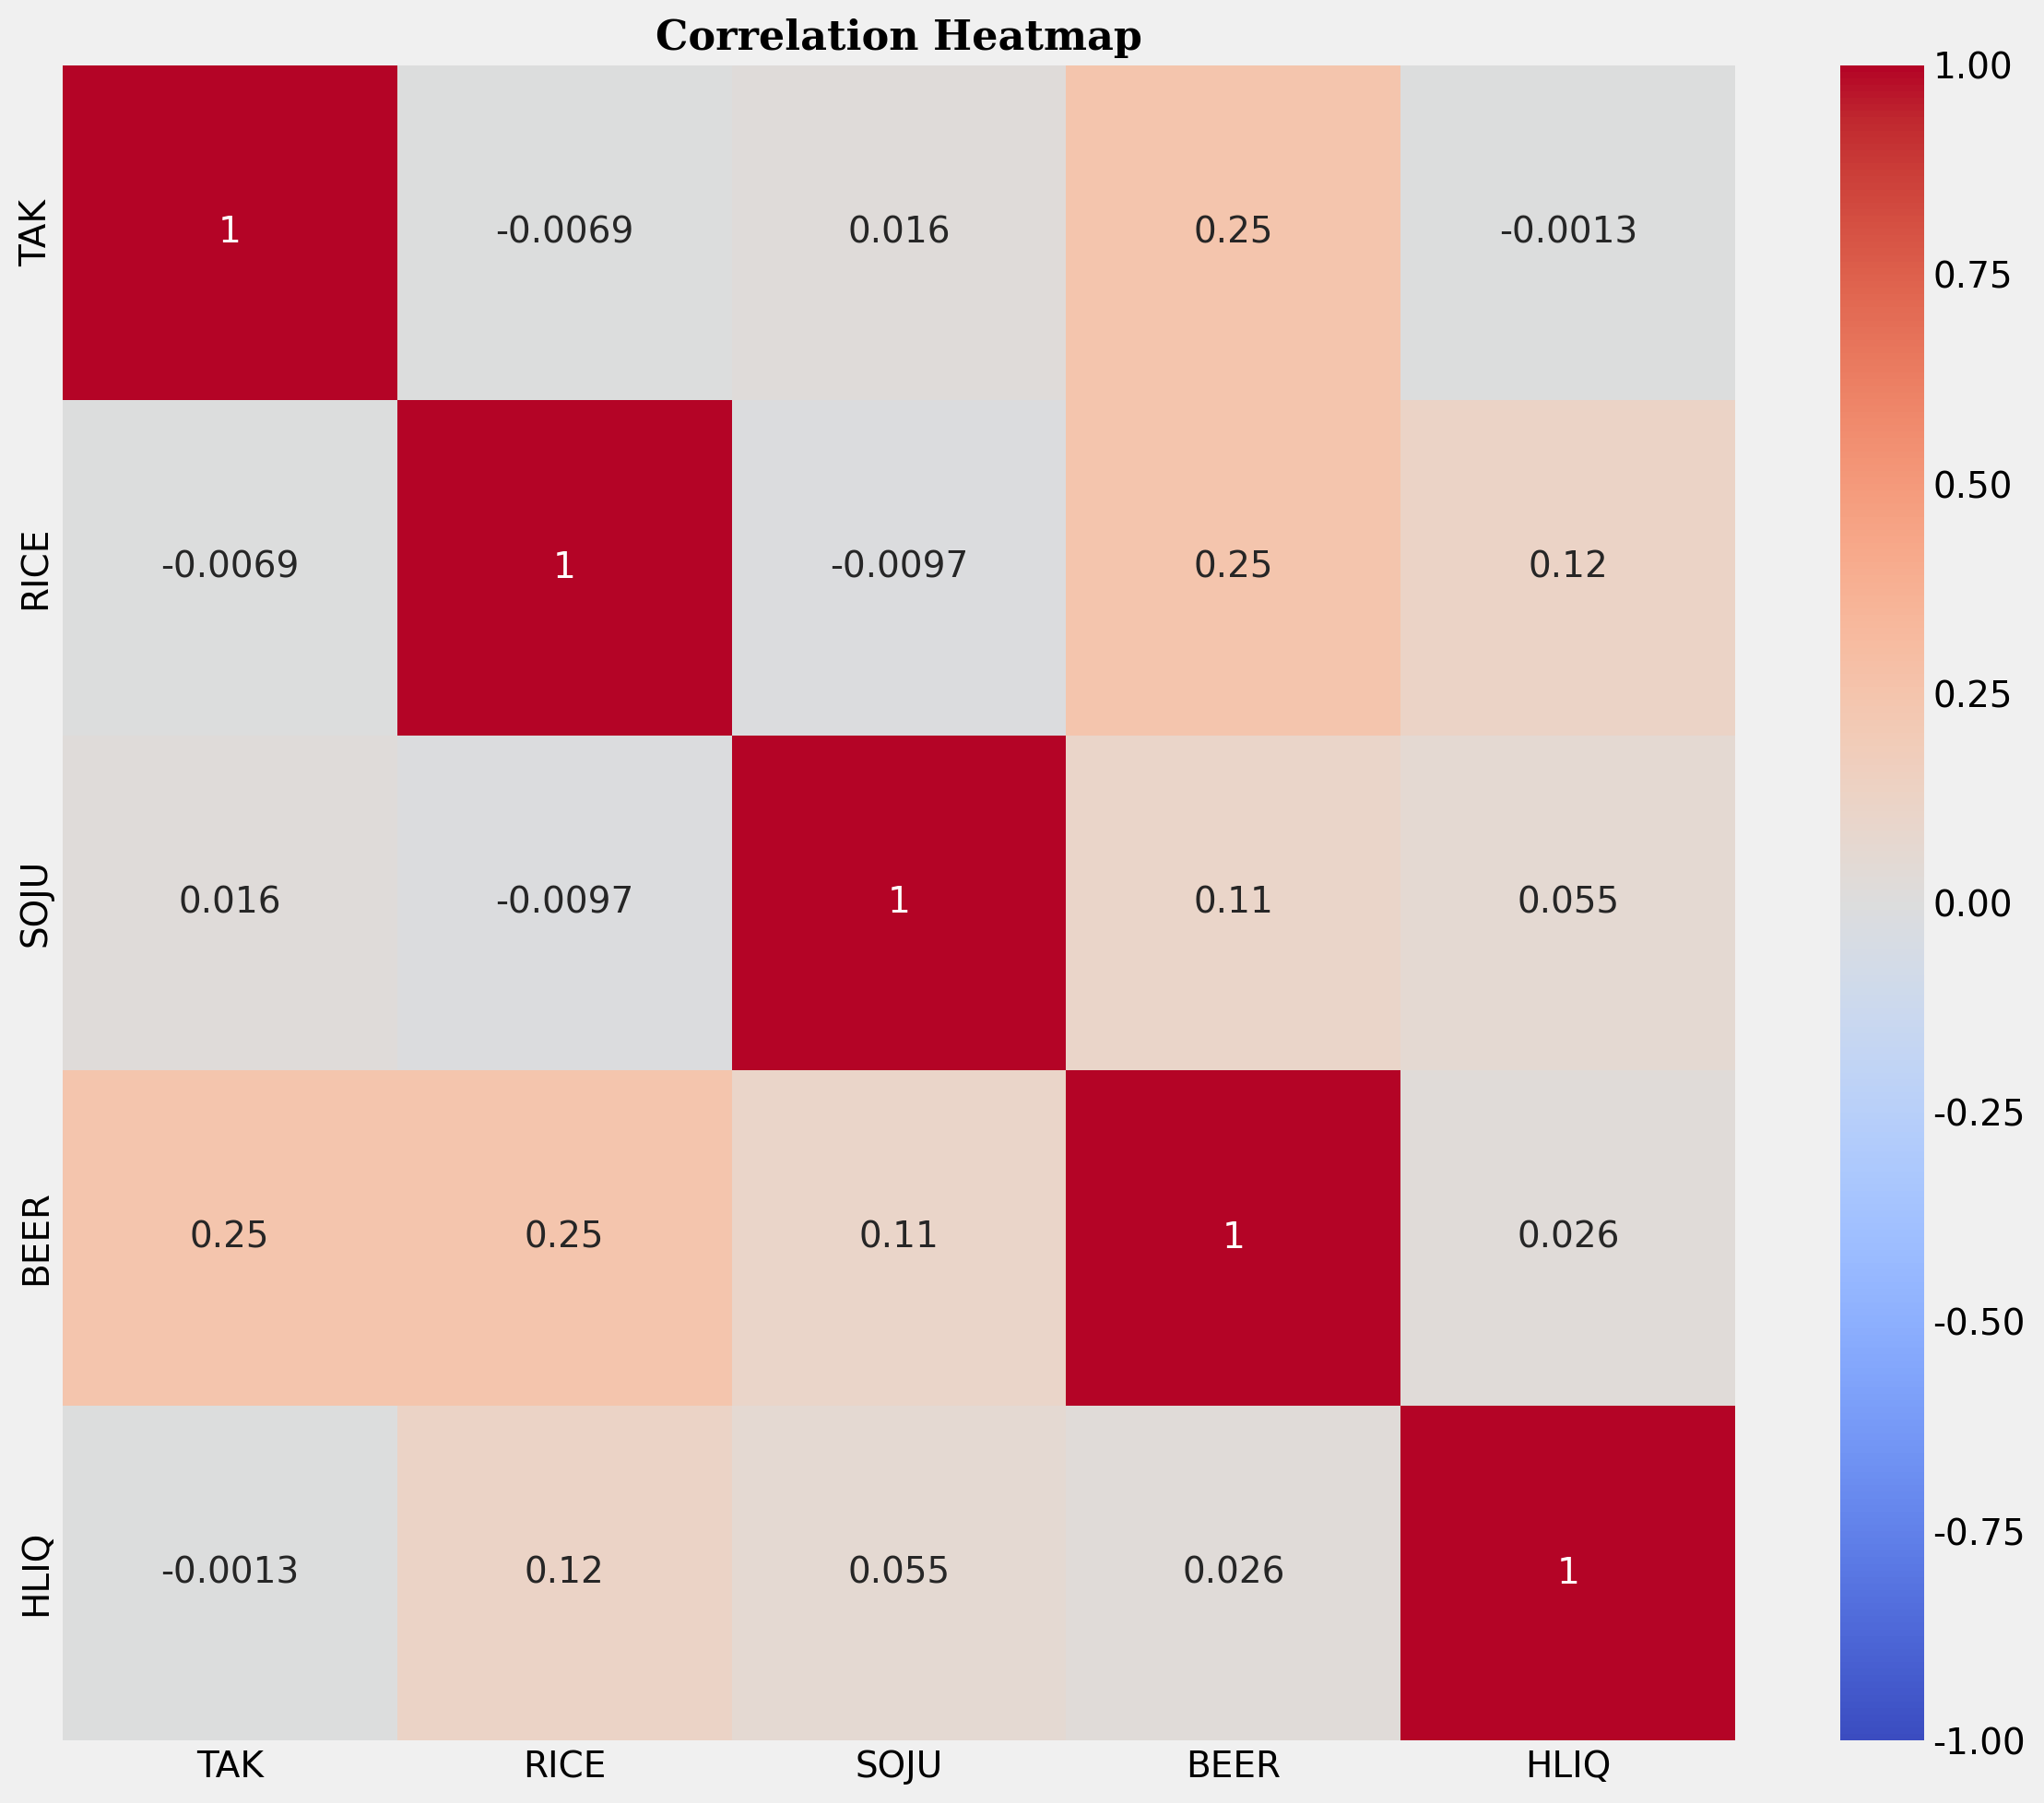

In [814]:
HM = R1_DRINK.select_dtypes(include=[np.number])
# Figure와 Axes 생성
fig, ax = plt.subplots(figsize=(12, 10))  # Figure 크기 설정

# Heatmap 시각화
sns.heatmap(HM.corr(),
            annot=True,           # 상관계수 값을 셀에 표시
            vmin=-1, vmax=1,      # 색상 범위 설정
            center=0,             # 색상 맵의 중앙값 설정
            cmap='coolwarm',      # 색상 맵 설정
            ax=ax)                # Axes 객체 지정

# 제목 추가
ax.set_title('Correlation Heatmap', fontsize=16, fontweight='bold', fontfamily='serif')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 흡연 관련으로만

In [815]:
# 결측치 확인
print(R1_SMOKE.isnull().sum())

SMOKE     9
SMDU     38
PSM      57
dtype: int64


In [816]:
# SMOKE는 1이 압도적으로 많기에 결측치 1으로 처리
R1_SMOKE['SMOKE']=R1_SMOKE['SMOKE'].fillna(1)

# SMOKE가 1이면 SMDU 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_SMDU_excluding_zeros = R1_SMOKE[R1_SMOKE['SMOKE'] != 1]['SMDU'].mean()
R1_SMOKE.loc[R1_SMOKE['SMOKE'] == 0, 'SMDU'] = 0
R1_SMOKE['SMDU'].fillna(round(mean_SMDU_excluding_zeros,1), inplace=True)
round(mean_SMDU_excluding_zeros,1)

# PSM 1로 처리
R1_SMOKE['PSM']=R1_SMOKE['PSM'].fillna(1)

<ipython-input-816-7c3ac5979194>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_SMOKE['SMOKE']=R1_SMOKE['SMOKE'].fillna(1)
<ipython-input-816-7c3ac5979194>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_SMOKE['SMDU'].fillna(round(mean_SMDU_excluding_zeros,1), inplace=True)
<ipython-input-816-7c3ac5979194>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

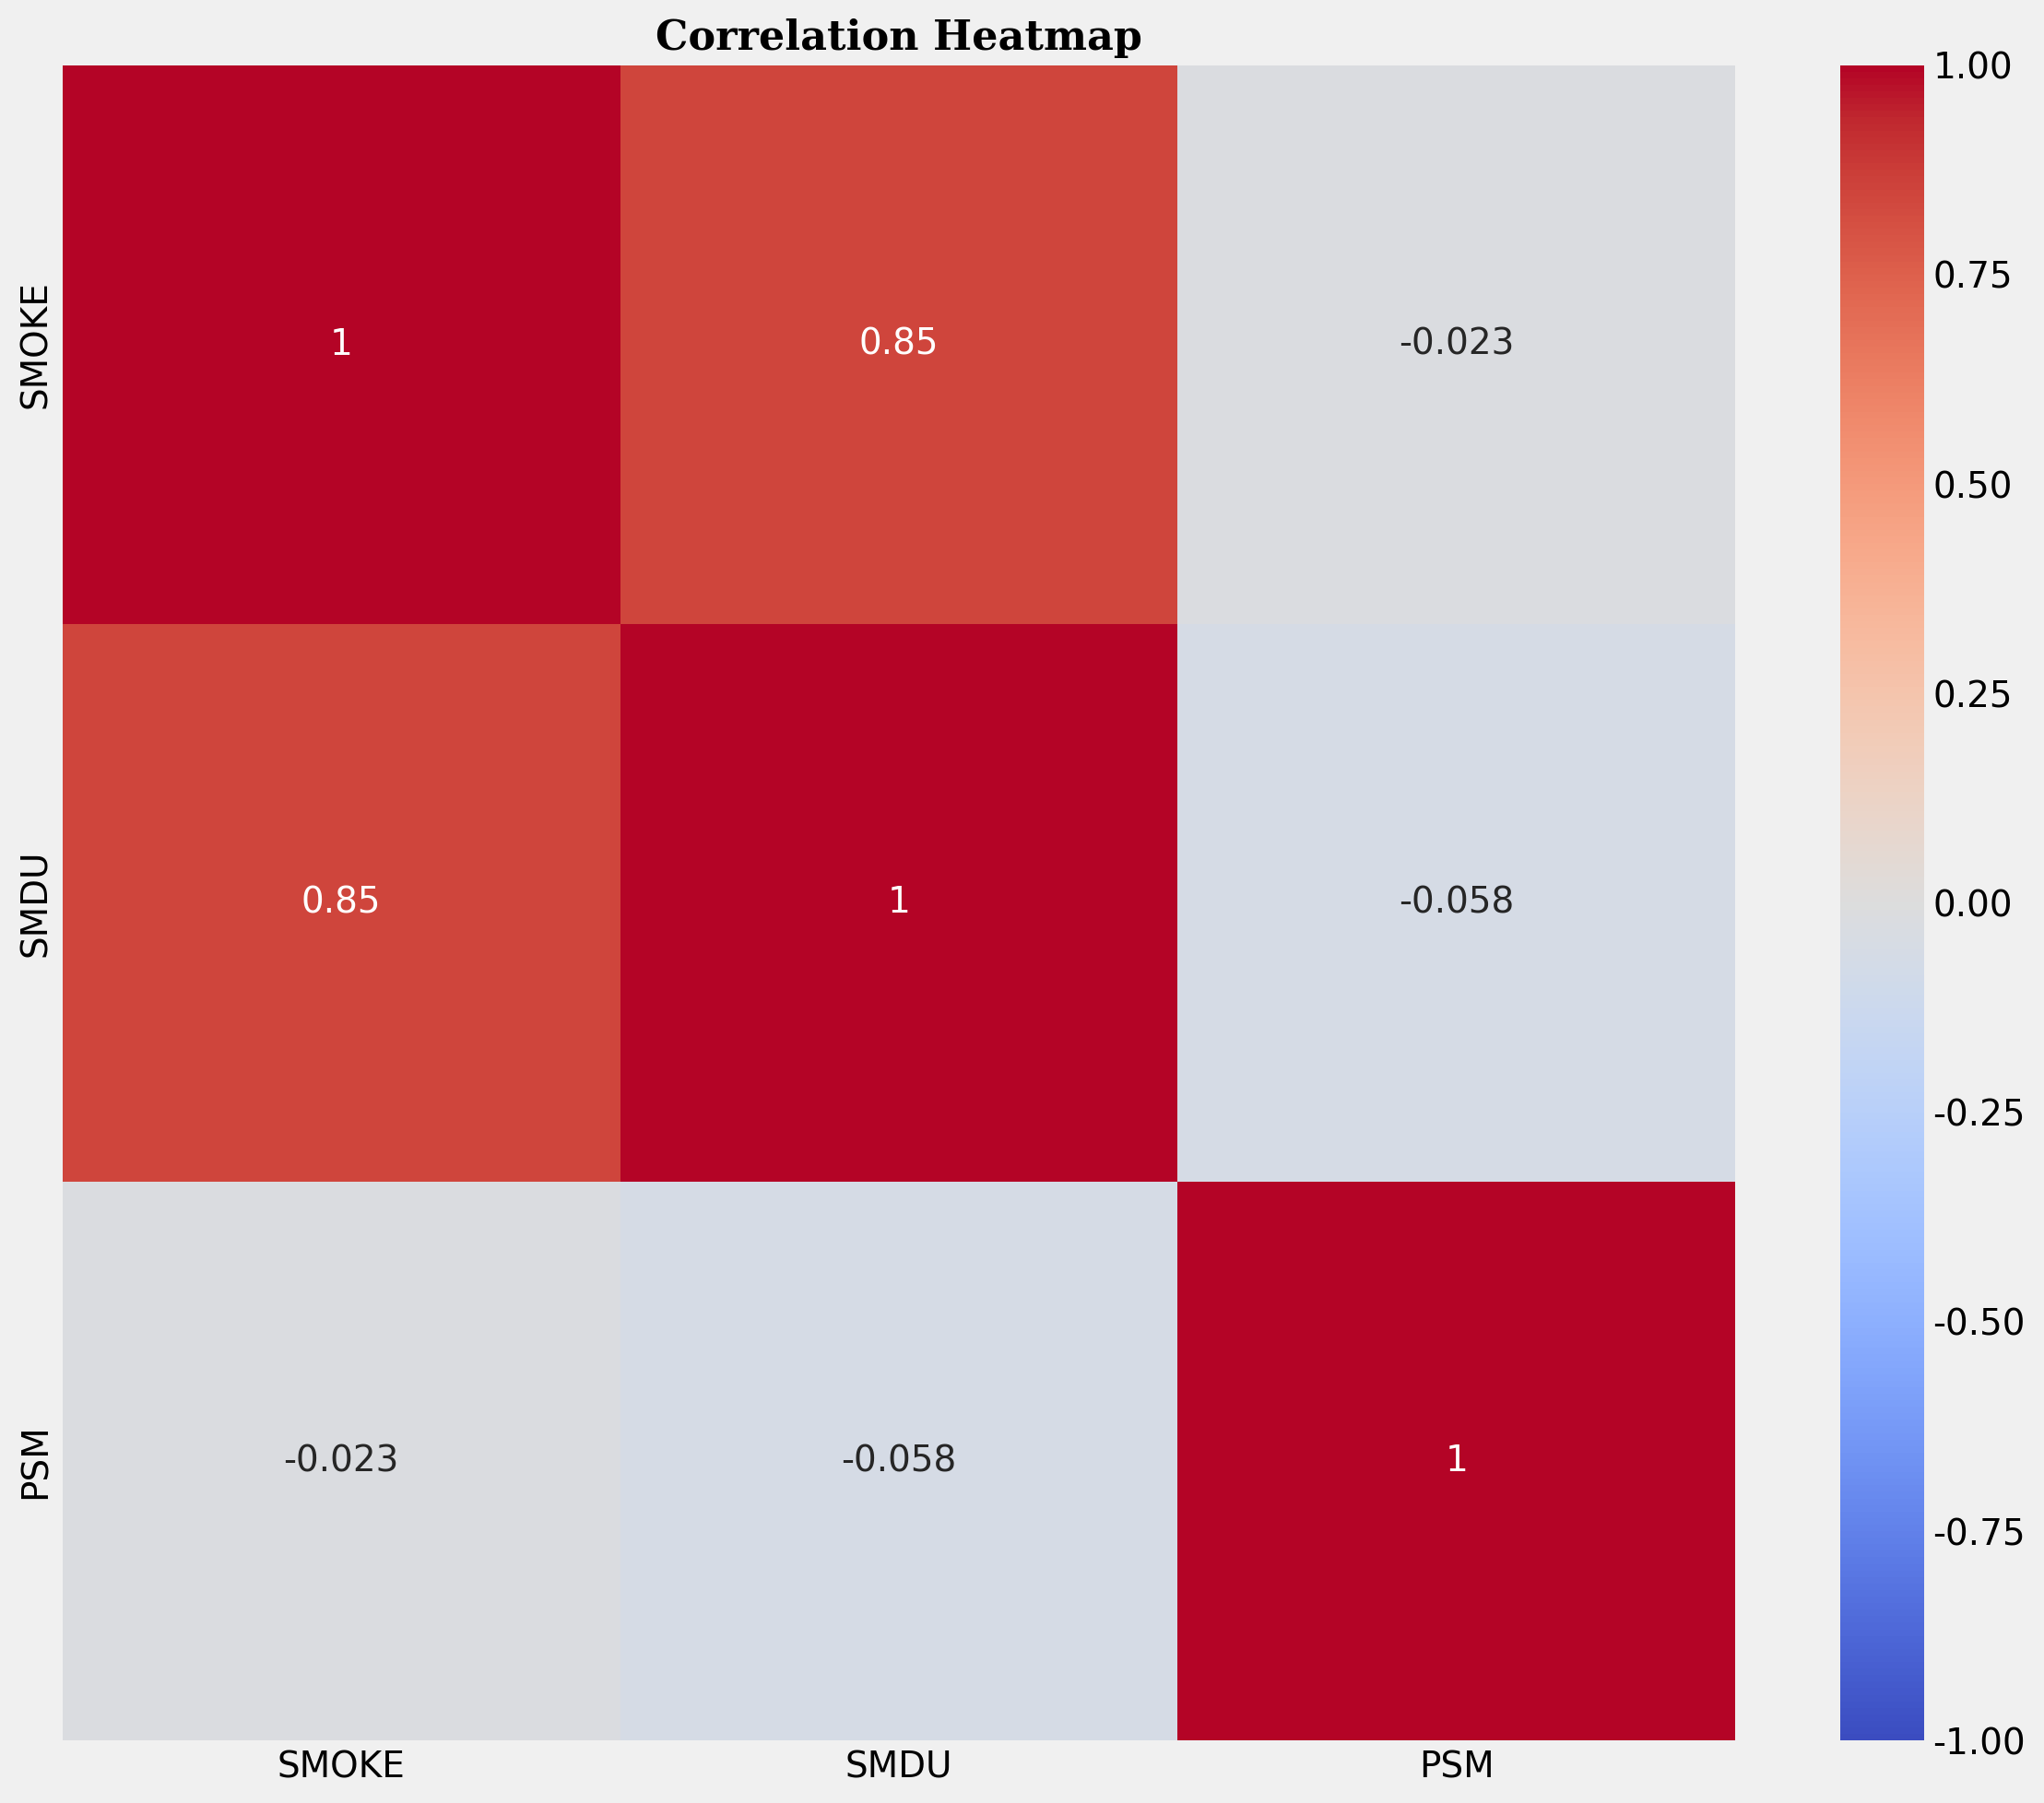

In [817]:
HM2 = R1_SMOKE.select_dtypes(include=[np.number])
# Figure와 Axes 생성
fig, ax = plt.subplots(figsize=(12, 10))  # Figure 크기 설정

# Heatmap 시각화
sns.heatmap(HM2.corr(),
            annot=True,           # 상관계수 값을 셀에 표시
            vmin=-1, vmax=1,      # 색상 범위 설정
            center=0,             # 색상 맵의 중앙값 설정
            cmap='coolwarm',      # 색상 맵 설정
            ax=ax)                # Axes 객체 지정

# 제목 추가
ax.set_title('Correlation Heatmap', fontsize=16, fontweight='bold', fontfamily='serif')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 고혈압 관련으로만

In [818]:
# 결측치 확인
print(R1_HTN.isnull().sum())

HTN      0
HTNAG    3
dtype: int64


In [819]:
# HTN이 1이면 HTNAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_htnag_excluding_zeros = R1_HTN[R1_HTN['HTN'] != 1]['HTNAG'].mean()
R1_HTN.loc[R1_HTN['HTN'] == 0, 'HTNAG'] = 0
R1_HTN['HTNAG'].fillna(round(mean_htnag_excluding_zeros,1), inplace=True)
round(mean_htnag_excluding_zeros,1)

<ipython-input-819-cbf0a542d74f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_HTN['HTNAG'].fillna(round(mean_htnag_excluding_zeros,1), inplace=True)


52.8

# 고지혈증 관련으로만

In [820]:
# 결측치 확인
print(R1_LIP.isnull().sum())

LIP      0
LIPAG    2
dtype: int64


In [821]:
# LIP이 1이면 LIPAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_lip_excluding_zeros = R1_LIP[R1_LIP['LIP'] != 1]['LIPAG'].mean()
R1_LIP.loc[R1_LIP['LIP'] == 0, 'LIPAG'] = 0
R1_LIP['LIPAG'].fillna(round(mean_lip_excluding_zeros,1), inplace=True)
round(mean_lip_excluding_zeros,1)

<ipython-input-821-15d0b638d0f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_LIP['LIPAG'].fillna(round(mean_lip_excluding_zeros,1), inplace=True)


52.4

# 가족력으로만

In [822]:
# 결측치 확인
print(R1_FAM.isnull().sum())

FMFHT       0
FMFHTAG    18
FMMHT       0
FMMHTAG    25
FMFDM       0
FMFDMAG     7
FMMDM       0
FMMDMAG    13
dtype: int64


In [823]:
# FMFHT가 1이면 FMFHTAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmfht_excluding_zeros = R1_FAM[R1_FAM['FMFHT'] != 1]['FMFHTAG'].mean()
R1_FAM.loc[R1_FAM['FMFHT'] == 0, 'FMFHTAG'] = 0
R1_FAM['FMFHTAG'].fillna(round(mean_fmfht_excluding_zeros,1), inplace=True)
round(mean_fmfht_excluding_zeros,1)

# FMMHT가 1이면 FMMHTAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmmht_excluding_zeros = R1_FAM[R1_FAM['FMMHT'] != 1]['FMMHTAG'].mean()
R1_FAM.loc[R1_FAM['FMMHT'] == 0, 'FMMHTAG'] = 0
R1_FAM['FMMHTAG'].fillna(round(mean_fmmht_excluding_zeros,1), inplace=True)
round(mean_fmmht_excluding_zeros,1)

# FMFDMd이 1이면 FMFDMAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmfdm_excluding_zeros = R1_FAM[R1_FAM['FMFDM'] != 1]['FMFDMAG'].mean()
R1_FAM.loc[R1_FAM['FMFDM'] == 0, 'FMFDMAG'] = 0
R1_FAM['FMFDMAG'].fillna(round(mean_fmfdm_excluding_zeros,1), inplace=True)
round(mean_fmfdm_excluding_zeros,1)

# FMMDM이 1이면 FMMDMAG 결측치 0으로 처리, 1이 아니면 0을 제외한 값의 평균으로 결측치 처리
mean_fmmdm_excluding_zeros = R1_FAM[R1_FAM['FMMDM'] != 1]['FMMDMAG'].mean()
R1_FAM.loc[R1_FAM['FMMDM'] == 0, 'FMMDMAG'] = 0
R1_FAM['FMMDMAG'].fillna(round(mean_fmmdm_excluding_zeros,1), inplace=True)
round(mean_fmmdm_excluding_zeros,1)

<ipython-input-823-c5f3e9f1f74d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_FAM['FMFHTAG'].fillna(round(mean_fmfht_excluding_zeros,1), inplace=True)
<ipython-input-823-c5f3e9f1f74d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_FAM['FMMHTAG'].fillna(round(mean_fmmht_excluding_zeros,1), inplace=True)
<ipython-input-823-c5f3e9f1f74d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_FAM['FMFDMAG'].fillna(round(mean_fmf

65.8

# 신체관련으로만

In [824]:
# 결측치 확인
print(R1_BODY.isnull().sum())

SEX             0
PMYN_C          6
PMAG_C         37
DM              0
HEIGHT          0
WEIGHT          0
WAIST           2
PULSE          44
HIP             3
SBP             0
DBP             0
HBA1C         318
GLU0           12
CREATININE      0
AST             0
ALT             0
TCHL            0
HDL             0
TG              1
INS0          196
dtype: int64


In [825]:
# SEX가 1이면 PMYN_C 결측치 0, 1이 아니면 2로 처리
R1_BODY.loc[(R1_BODY['SEX'] == 1) & (R1_BODY['PMYN_C'].isnull()), 'PMYN_C'] = 0
R1_BODY.loc[(R1_BODY['SEX'] != 1) & (R1_BODY['PMYN_C'].isnull()), 'PMYN_C'] = 2
R1_BODY['PMYN_C'].value_counts()

# PMYN_C가 2가 아니면, PMAG_C 결측치 0, 2이면 0을 제외한 PMAG_C의 평균으로 처리
mean_pmag_excluding_zeros = R1_BODY[R1_BODY['PMYN_C'] == 2]['PMAG_C'].mean()
R1_BODY.loc[R1_BODY['PMYN_C'] != 2, 'PMAG_C'] = 0
R1_BODY['PMAG_C'].fillna(round(mean_pmag_excluding_zeros,1), inplace=True)
round(mean_pmag_excluding_zeros,1)

# 나머지 결측치는 전부 평균으로 처리
R1_BODY['WAIST'].fillna(round(R1_BODY['WAIST'].mean(),1), inplace=True)
R1_BODY['PULSE'].fillna(round(R1_BODY['PULSE'].mean(),1), inplace=True)
R1_BODY['HIP'].fillna(round(R1_BODY['HIP'].mean(),1), inplace=True)
R1_BODY['HBA1C'].fillna(round(R1_BODY['HBA1C'].mean(),1), inplace=True)
R1_BODY['GLU0'].fillna(round(R1_BODY['GLU0'].mean(),1), inplace=True)
R1_BODY['TG'].fillna(round(R1_BODY['TG'].mean(),1), inplace=True)
R1_BODY['INS0'].fillna(round(R1_BODY['INS0'].mean(),1), inplace=True)

<ipython-input-825-faf2d340b164>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_BODY['PMAG_C'].fillna(round(mean_pmag_excluding_zeros,1), inplace=True)
<ipython-input-825-faf2d340b164>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_BODY['WAIST'].fillna(round(R1_BODY['WAIST'].mean(),1), inplace=True)
<ipython-input-825-faf2d340b164>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1_BODY['PULSE'].fillna(round(R1_BODY['PULSE

# 카테고리별 테이블 전부 통합

In [846]:
RECORD=pd.concat([R1_1['DM'],R1_DRINK,R1_SMOKE,R1_HTN,R1_LIP,R1_FAM,R1_BODY],axis=1)
RECORD.head()

,DM,TAK,RICE,SOJU,BEER,HLIQ,SMOKE,SMDU,PSM,HTN,...,DBP,HBA1C,GLU0,CREATININE,AST,ALT,TCHL,HDL,TG,INS0
0,1,0.0,0.0,30.0,0.0,0.0,3.0,40.0,2.0,1,...,80,5.6,82.0,0.7,30,38,154,35,126.0,6.7
1,1,0.0,0.0,480.0,10.0,0.0,2.0,20.0,1.0,1,...,118,5.5,130.0,1.1,46,75,214,44,169.0,4.3
2,1,0.0,0.0,0.0,0.0,0.0,2.0,15.0,1.0,2,...,90,5.2,83.0,0.9,29,45,130,27,134.0,7.9
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,...,90,5.6,89.0,0.6,35,34,182,47,123.0,12.6
4,1,0.0,0.0,70.0,0.0,0.0,3.0,20.0,1.0,1,...,79,6.9,95.0,1.0,52,33,203,36,277.0,2.7


In [848]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson 변환기 (standardize=False를 설정하여 변환 후 표준화하지 않음)
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# SOJU 컬럼에 Yeo-Johnson 변환 적용
RECORD['SOJU_yeo_johnson'] = pt.fit_transform(RECORD[['SOJU']])

# 새 섹션

In [827]:
from sklearn.preprocessing import RobustScaler

rs=RobustScaler()

# Convert the selected columns to a NumPy array
data = R1_1_DRINK[['TAK','RICE','SOJU','BEER','HLIQ']].values

# Use the fit_transform method on the NumPy array
transformed_data = rs.fit_transform(data)

# Assign the transformed data back to the DataFrame
R1_1_DRINK[['TAK','RICE','SOJU','BEER','HLIQ']] = transformed_data

R1_1_DRINK.head()

,DM,TAK,RICE,SOJU,BEER,HLIQ
0,1,0.0,0.0,1.142857,0.0,0.0
1,1,0.0,0.0,18.285714,10.0,0.0
2,1,0.0,0.0,0.000000,0.0,0.0
3,1,0.0,0.0,0.000000,0.0,0.0
4,1,0.0,0.0,2.666667,0.0,0.0


In [828]:
# 음주유형과 당뇨병의 크로스탭
DM_DRINK=pd.crosstab(R1_1['DRINK'],R1_1['DM'])
DM_DRINK

DM,1,2
DRINK,,
1.0,450,37
2.0,41,2
3.0,433,30


**당뇨와 타 요소들의 평균간의 관계**

In [829]:
# 당뇨와 키간의 관계?
# 키는 큰 차이가 없다
DM_HEIGHT_AVG=R1_1.groupby('DM')['HEIGHT'].mean()
DM_HEIGHT_AVG

,HEIGHT
DM,
1,159.331183
2,160.028571


In [830]:
# 당뇨와 몸무게간의 관계?
DM_WEIGHT_AVG=R1_1.groupby('DM')['WEIGHT'].mean()
DM_WEIGHT_AVG

,WEIGHT
DM,
1,62.589247
2,65.400000


In [831]:
# 당뇨와 허리둘레간의 관계?
DM_WAIST_AVG=R1_1.groupby('DM')['WAIST'].mean()
DM_WAIST_AVG

,WAIST
DM,
1,83.247845
2,87.857143


In [832]:
# 당뇨와 맥박의 관계?
DM_PULSE_AVG=R1_1.groupby('DM')['PULSE'].mean()
DM_PULSE_AVG

,PULSE
DM,
1,65.170787
2,69.712121


In [833]:
# 당뇨와 엉덩이둘레간의 관계?
DM_HIP_AVG=R1_1.groupby('DM')['HIP'].mean()
DM_HIP_AVG

,HIP
DM,
1,93.880259
2,94.057143


In [834]:
# 당뇨와 수축기혈압간의 관계?
DM_SBP_AVG=R1_1.groupby('DM')['SBP'].mean()
DM_SBP_AVG

,SBP
DM,
1,123.224731
2,125.142857


In [835]:
# 당뇨와 이완기혈압간의 관계?
DM_DBP_AVG=R1_1.groupby('DM')['DBP'].mean()
DM_DBP_AVG

,DBP
DM,
1,80.791398
2,79.114286


In [836]:
# 당뇨와 HBA1C간의 관계?
DM_HBA1C_AVG=R1_1.groupby('DM')['HBA1C'].mean()
DM_HBA1C_AVG

,HBA1C
DM,
1,5.608937
2,7.360606


In [837]:
# 당뇨와 GLU0간의 관계?
DM_GLU0_AVG=R1_1.groupby('DM')['GLU0'].mean()
DM_GLU0_AVG

,GLU0
DM,
1,87.339074
2,136.796610


In [838]:
# 당뇨와 CREATININE간의 관계?
DM_CREATININE_AVG=R1_1.groupby('DM')['CREATININE'].mean()
DM_CREATININE_AVG

,CREATININE
DM,
1,0.871935
2,0.935714


In [839]:
# 당뇨와 AST간의 관계?
DM_AST_AVG=R1_1.groupby('DM')['AST'].mean()
DM_AST_AVG

,AST
DM,
1,27.802151
2,25.614286


In [840]:
# 당뇨와 ALT간의 관계?
DM_ALT_AVG=R1_1.groupby('DM')['ALT'].mean()
DM_ALT_AVG

,ALT
DM,
1,25.551613
2,26.100000


In [841]:
# 당뇨와 TCHL간의 관계?
DM_TCHL_AVG=R1_1.groupby('DM')['TCHL'].mean()
DM_TCHL_AVG

,TCHL
DM,
1,191.823656
2,190.257143


In [842]:
# 당뇨와 HDL간의 관계?
DM_HDL_AVG=R1_1.groupby('DM')['HDL'].mean()
DM_HDL_AVG

,HDL
DM,
1,44.934409
2,41.557143


In [843]:
# 당뇨와 TG간의 관계?
DM_TG_AVG=R1_1.groupby('DM')['TG'].mean()
DM_TG_AVG

,TG
DM,
1,152.550054
2,185.728571


In [844]:
# 당뇨와 INS0간의 관계?
DM_INS0_AVG=R1_1.groupby('DM')['INS0'].mean()
DM_INS0_AVG

,INS0
DM,
1,7.739249
2,8.334375
